In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import utils.mp1 as generator

Using TensorFlow backend.


In [124]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import optimizers
from keras.utils import to_categorical, normalize
from keras.regularizers import l2

## 3) Simple Classification

__Generate dataset__

In [3]:
[X_train, Y_train] = generator.generate_dataset_classification(800, 20)

  1%|          | 7/800 [00:00<00:11, 66.77it/s]

Creating data:


100%|██████████| 800/800 [00:10<00:00, 76.74it/s]


Quick look at random samples from the dataset

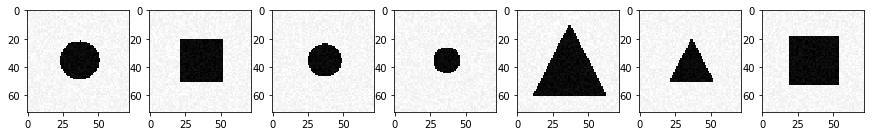

In [4]:
batch_size = 7
fig, ax = plt.subplots(1, batch_size, figsize=(15, batch_size * 5))

random_batch = random.choices(X_train, k=batch_size)
for i, item in enumerate(random_batch):
    ax[i].imshow(item.reshape(generator.IMAGE_SIZE, -1), cmap='gray')

Quick look at labels distribution

In [5]:
print(np.unique(Y_train, return_counts=True))

(array([0., 1., 2.]), array([277, 264, 259]))


Fairly distributed

__Model__

In [6]:
input_shape = X_train[0].shape
dense_units = 3

In [7]:
# Input layer
x_in = Input(shape=input_shape)

# Fully connected
x = Dense(units=dense_units, activation='softmax')(x_in)

model = Model(inputs=[x_in], outputs=[x])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5184)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [9]:
simple_model_path = "models/simple_model_untrained.h5"
model.save(simple_model_path)

In [10]:
y_train = to_categorical(Y_train)

__Training with SGD optimizer__

In [11]:
model_sgd = load_model(simple_model_path)

sgd = optimizers.SGD(lr=0.001, decay=1e-5, momentum=0.6, nesterov=True)
model_sgd.compile(loss='categorical_crossentropy', 
                  metrics = ['accuracy'],
                  optimizer=sgd)

/Users/dieze/anaconda/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [12]:
loss = model_sgd.fit(X_train, 
                     y_train,
                     batch_size = 32,
                     epochs = 12,
                     validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/12
640/640 [==============================] - 0s 241us/step - loss: 1.0492 - acc: 0.4812 - val_loss: 0.8072 - val_acc: 0.6687
Epoch 2/12
640/640 [==============================] - 0s 58us/step - loss: 0.7385 - acc: 0.6750 - val_loss: 0.5995 - val_acc: 0.9062
Epoch 3/12
640/640 [==============================] - 0s 70us/step - loss: 0.6041 - acc: 0.7656 - val_loss: 0.5029 - val_acc: 0.8438
Epoch 4/12
640/640 [==============================] - 0s 73us/step - loss: 0.5364 - acc: 0.7969 - val_loss: 0.5665 - val_acc: 0.6500
Epoch 5/12
640/640 [==============================] - 0s 70us/step - loss: 0.5020 - acc: 0.8062 - val_loss: 0.4065 - val_acc: 0.8625
Epoch 6/12
640/640 [==============================] - 0s 78us/step - loss: 0.4829 - acc: 0.8031 - val_loss: 0.4144 - val_acc: 0.8125
Epoch 7/12
640/640 [==============================] - 0s 56us/step - loss: 0.4224 - acc: 0.8469 - val_loss: 0.3748 - val_acc: 0.8375
Epoch 8/12
640/640 [==

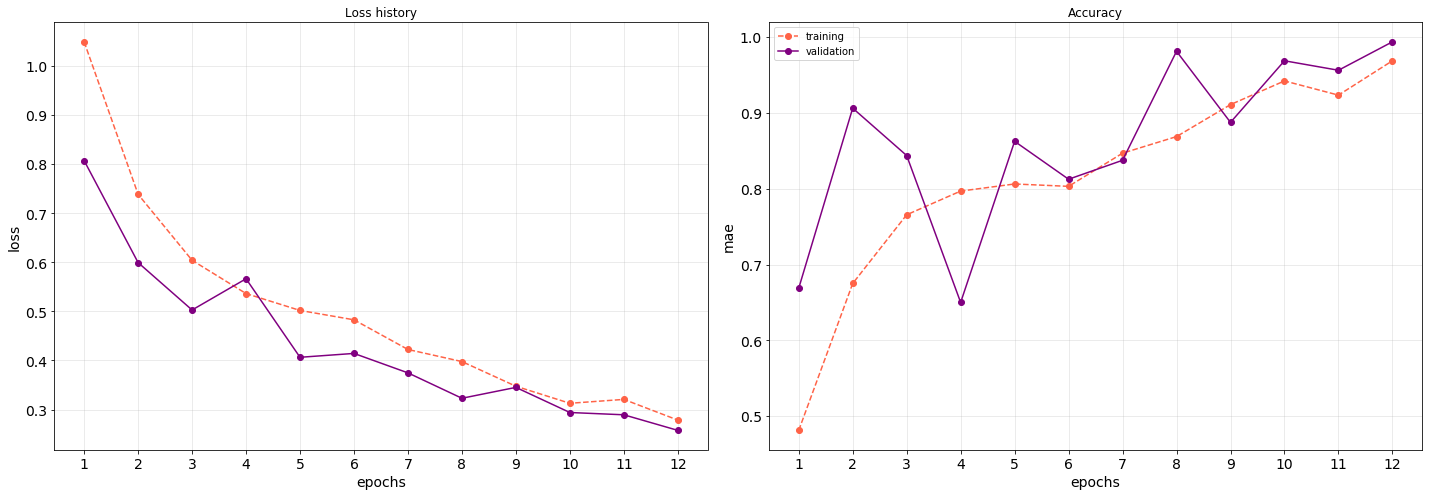

In [13]:
generator.plotLossHistory(loss)
plt.show()

__Training with Adam optimizer__

In [14]:
model_adam = load_model(simple_model_path)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.95, epsilon=None, decay=0.0, amsgrad=False)
model_adam.compile(loss='categorical_crossentropy', 
                   metrics = ['accuracy'],
                   optimizer=adam)

/Users/dieze/anaconda/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [15]:
loss = model_adam.fit(X_train, 
                      y_train,
                      batch_size = 32,
                      epochs = 10,
                      validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/10
640/640 [==============================] - 0s 289us/step - loss: 1.9647 - acc: 0.4469 - val_loss: 1.1091 - val_acc: 0.5250
Epoch 2/10
640/640 [==============================] - 0s 60us/step - loss: 0.6873 - acc: 0.6813 - val_loss: 0.4468 - val_acc: 0.7562
Epoch 3/10
640/640 [==============================] - 0s 82us/step - loss: 0.3593 - acc: 0.8656 - val_loss: 0.2630 - val_acc: 0.9625
Epoch 4/10
640/640 [==============================] - 0s 109us/step - loss: 0.2610 - acc: 0.9234 - val_loss: 0.5295 - val_acc: 0.6312
Epoch 5/10
640/640 [==============================] - 0s 73us/step - loss: 0.2730 - acc: 0.8641 - val_loss: 0.1715 - val_acc: 1.0000
Epoch 6/10
640/640 [==============================] - 0s 67us/step - loss: 0.1658 - acc: 0.9672 - val_loss: 0.1226 - val_acc: 0.9938
Epoch 7/10
640/640 [==============================] - 0s 71us/step - loss: 0.1229 - acc: 0.9906 - val_loss: 0.1565 - val_acc: 0.9187
Epoch 8/10
640/640 [=

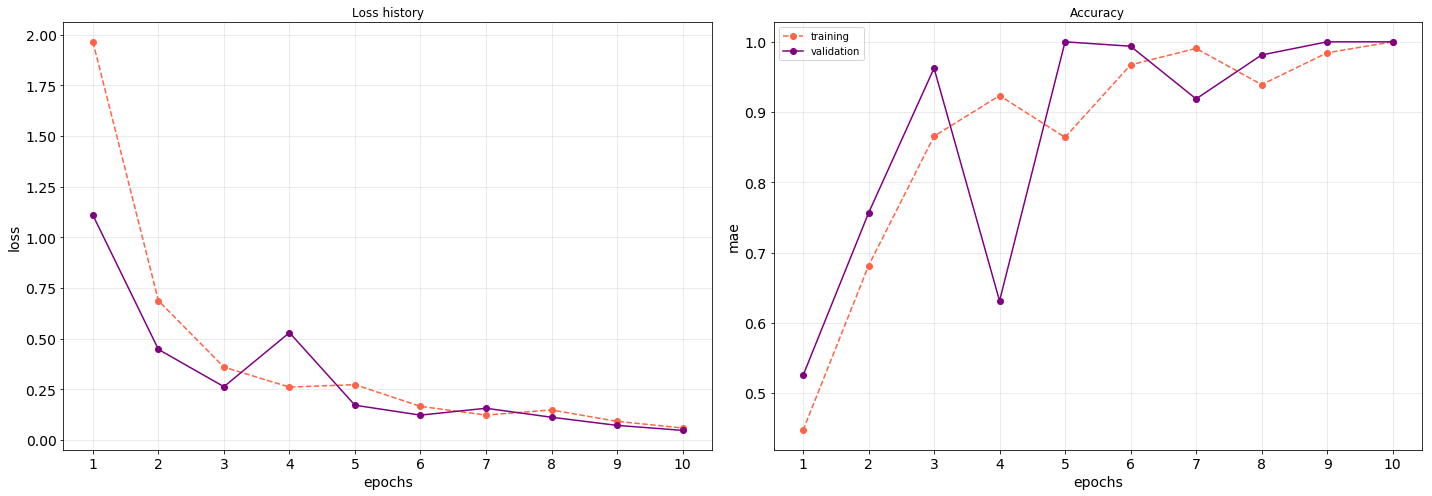

In [16]:
generator.plotLossHistory(loss)
plt.show()

## 4) Visualize the solution

In [17]:
weights_sgd = model_sgd.get_weights()[0]
weights_adam = model_adam.get_weights()[0]

Text(0.5,1,'Adam - Triangle')

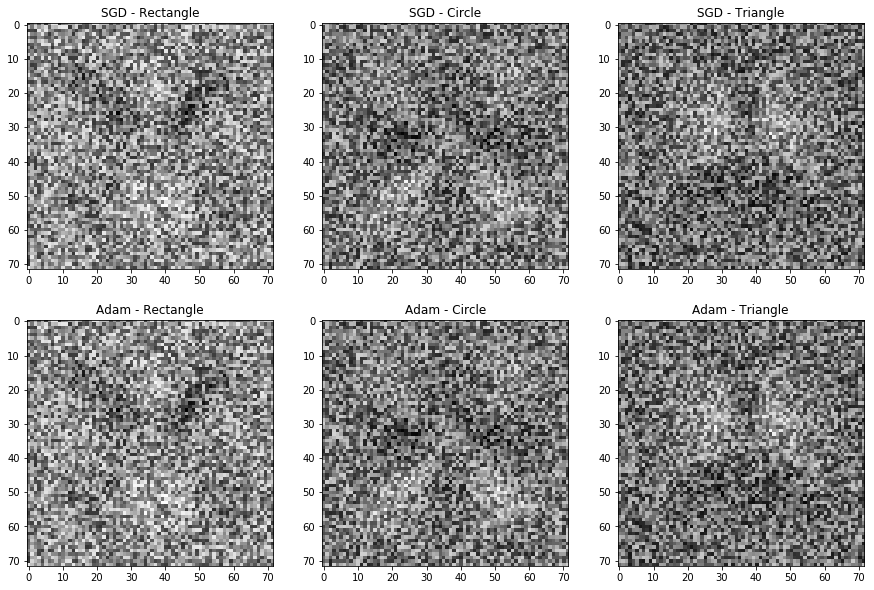

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(weights_sgd[:,0].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[0, 0].set_title("SGD - Rectangle")
ax[0, 1].imshow(weights_sgd[:,1].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[0, 1].set_title("SGD - Circle")
ax[0, 2].imshow(weights_sgd[:,2].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[0, 2].set_title("SGD - Triangle")

ax[1, 0].imshow(weights_sgd[:,0].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[1, 0].set_title("Adam - Rectangle")
ax[1, 1].imshow(weights_sgd[:,1].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[1, 1].set_title("Adam - Circle")
ax[1, 2].imshow(weights_sgd[:,2].reshape(generator.IMAGE_SIZE, -1), cmap='gray')
ax[1, 2].set_title("Adam - Triangle")

## 5) A More Difficult Classification Problem

In [19]:
[X_train, Y_train] = generator.generate_dataset_classification(800, 20, True)
y_train = to_categorical(Y_train)

  1%|          | 9/800 [00:00<00:09, 83.42it/s]

Creating data:


100%|██████████| 800/800 [00:10<00:00, 74.52it/s]


In [20]:
model_adam = load_model(simple_model_path)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.95, epsilon=None, decay=0.0, amsgrad=False)
model_adam.compile(loss='categorical_crossentropy', 
                   metrics = ['accuracy'],
                   optimizer=adam)

loss = model_adam.fit(X_train, 
                      y_train,
                      batch_size = 32,
                      epochs = 24,
                      validation_split=0.2)

/Users/dieze/anaconda/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Train on 640 samples, validate on 160 samples
Epoch 1/24
640/640 [==============================] - 0s 347us/step - loss: 2.1799 - acc: 0.3312 - val_loss: 1.0340 - val_acc: 0.4562
Epoch 2/24
640/640 [==============================] - 0s 52us/step - loss: 1.1648 - acc: 0.4484 - val_loss: 1.4015 - val_acc: 0.4938
Epoch 3/24
640/640 [==============================] - 0s 75us/step - loss: 1.1275 - acc: 0.4906 - val_loss: 1.0778 - val_acc: 0.4813
Epoch 4/24
640/640 [==============================] - 0s 54us/step - loss: 1.0952 - acc: 0.5328 - val_loss: 0.8710 - val_acc: 0.5625
Epoch 5/24
640/640 [==============================] - 0s 73us/step - loss: 1.0488 - acc: 0.4969 - val_loss: 1.1218 - val_acc: 0.3250
Epoch 6/24
640/640 [==============================] - 0s 53us/step - loss: 1.0301 - acc: 0.5375 - val_loss: 0.8741 - val_acc: 0.5000
Epoch 7/24
640/640 [==============================] - 0s 74us/step - loss: 0.8769 - acc: 0.5984 - val_loss: 0.9152 - val_acc: 0.5437
Epoch 8/24
640/640 [==

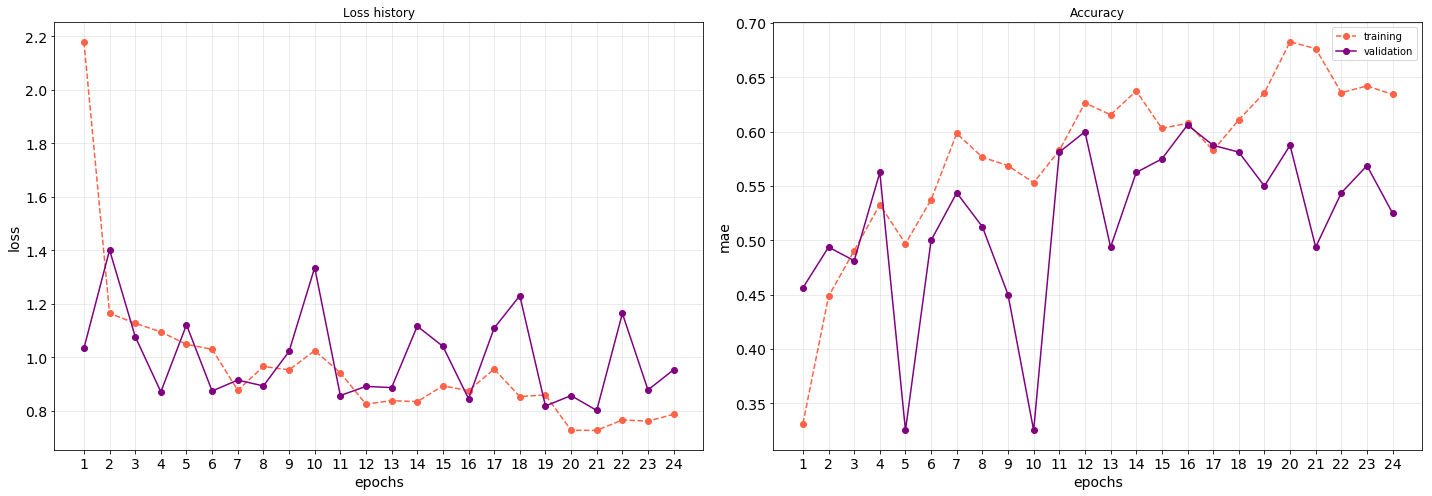

In [21]:
generator.plotLossHistory(loss)
plt.show()

__Evaluate on testing set__

In [22]:
[X_test, Y_test] = generator.generate_test_set_classification()

  3%|▎         | 9/300 [00:00<00:03, 80.08it/s]

Creating data:


100%|██████████| 300/300 [00:03<00:00, 81.51it/s]


In [23]:
# loss and accuracy
model_adam.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 36us/step


[0.9235421959559122, 0.5433333333333333]

__Convnet__

In [49]:
[X_train, Y_train] = generator.generate_dataset_classification(2000, 20, True)
y_train = to_categorical(Y_train)

  0%|          | 6/2000 [00:00<00:33, 59.31it/s]

Creating data:


100%|██████████| 2000/2000 [00:29<00:00, 24.28it/s]


In [71]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU
from keras.callbacks import EarlyStopping

In [51]:
# Input layer
x_in = Input(shape=(generator.IMAGE_SIZE, generator.IMAGE_SIZE, 1))

# Convolutional layer
x = Conv2D(16, kernel_size=5)(x_in)
x = LeakyReLU(alpha=0.3)(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.5)(x)

# Fully connected
x = Dense(units=dense_units, activation='softmax')(x)

conv_model = Model(inputs=[x_in], outputs=[x])

In [52]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 68, 68, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                1183808   
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
__________

In [54]:
conv_model.compile(loss='categorical_crossentropy', 
                   metrics = ['accuracy'],
                   optimizer=adam)

loss = conv_model.fit(X_train.reshape(2000, 72, 72, 1), 
                      y_train,
                      batch_size = 100,
                      epochs = 40,
                      validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/40
1600/1600 [==============================] - 6s 4ms/step - loss: 1.2602 - acc: 0.3450 - val_loss: 1.1237 - val_acc: 0.3150
Epoch 2/40
1600/1600 [==============================] - 5s 3ms/step - loss: 1.1044 - acc: 0.3400 - val_loss: 1.0767 - val_acc: 0.2975
Epoch 3/40
1600/1600 [==============================] - 4s 3ms/step - loss: 1.0563 - acc: 0.3969 - val_loss: 1.0251 - val_acc: 0.4750
Epoch 4/40
1600/1600 [==============================] - 5s 3ms/step - loss: 1.0170 - acc: 0.4519 - val_loss: 0.9535 - val_acc: 0.5400
Epoch 5/40
1600/1600 [==============================] - 5s 3ms/step - loss: 0.9673 - acc: 0.5087 - val_loss: 0.9024 - val_acc: 0.5550
Epoch 6/40
1600/1600 [==============================] - 5s 3ms/step - loss: 0.9109 - acc: 0.5387 - val_loss: 0.8914 - val_acc: 0.6200
Epoch 7/40
1600/1600 [==============================] - 5s 3ms/step - loss: 0.8946 - acc: 0.5387 - val_loss: 0.8731 - val_acc: 0.6250
Epoch 8/40
1600

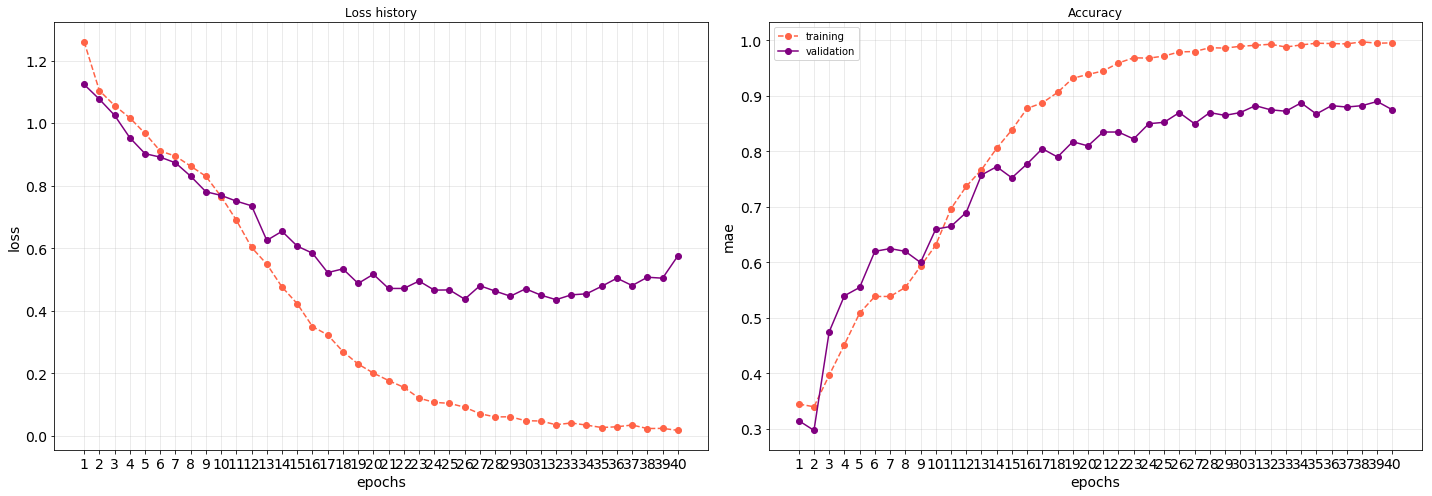

In [55]:
generator.plotLossHistory(loss)
plt.show()

In [57]:
# loss and accuracy
conv_model.evaluate(X_test.reshape(X_test.shape[0], 72, 72, 1), Y_test)

300/300 [==============================] - 0s 2ms/step


[0.3498748644193013, 0.8933333325386047]

## 6) A Regression Problem

__Generate datasets__

In [233]:
[X_train, Y_train] = generator.generate_dataset_regression(600, 20)
[X_test, Y_test] = generator.generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


__Preprocess data__

In [249]:
foo = normalize(X_train)

In [255]:
np.max(X_train)

0.9999999943631133

In [149]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [257]:
def normalize_dataset(X, y):
    max_val = np.max(X)
    min_val = np.min(X)
    X = (X - min_val) / (max_val - min_val)
    y = (y - min_val) / (max_val - min_val)
    X = X - 0.5
    y = y - 0.5
    return [X, y]

def sort_vertices(vertices_array):
    vertices = list(vertices_array.reshape(3, 2))
    vertices.sort(key=lambda x: x[0])
    return np.ravel(vertices)

In [258]:
y_train = np.apply_along_axis(sort_vertices, axis=1, arr=Y_train)
y_test = np.apply_along_axis(sort_vertices, axis=1, arr=Y_test)

[X_train, y_train] = normalize_dataset(X_train, y_train)
[X_test, y_test] = normalize_dataset(X_test, y_test)

__Generate model__

In [262]:
n_sample = len(X_train)
input_shape = (generator.IMAGE_SIZE, generator.IMAGE_SIZE, 1)
reg_param = 1e-6

In [297]:
x_in = Input(shape=input_shape)

# Convolutional blocks
x = Conv2D(32, kernel_size=6, kernel_regularizer=l2(reg_param))(x_in)
# x = LeakyReLU(alpha=0.3)(x)
x = Conv2D(16, kernel_size=3)(x)
x = LeakyReLU(alpha=0.5)(x)
x = Conv2D(8, kernel_size=2)(x)
# x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)

# Fully connected
x = Dense(units=64, kernel_regularizer=l2(reg_param), activation='tanh')(x)
x = Dropout(rate=0.5)(x)

# Output layer
x = Dense(units=6)(x)

reg_model = Model(inputs=[x_in], outputs=[x])

In [298]:
reg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 67, 67, 32)        1184      
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 65, 65, 16)        4624      
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 65, 65, 16)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 64, 64, 8)         520       
_________________________________________________________________
flatten_40 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_82 (Dense)             (None, 64)                2097216   
__________

In [299]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.995, epsilon=None, decay=1e-6, amsgrad=False) 
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=1e-3,
                               patience=5)

In [300]:
reg_model.compile(loss='mean_squared_error', 
                   optimizer=adam)

loss = reg_model.fit(X_train.reshape((n_sample,) + input_shape), 
                      y_train,
                      batch_size = 32,
                      epochs = 30,
                      validation_split=0.2,
                      callbacks=[early_stopping])

Train on 480 samples, validate on 120 samples
Epoch 1/30
480/480 [==============================] - 8s 16ms/step - loss: 3.2237 - val_loss: 0.4739
Epoch 2/30
480/480 [==============================] - 6s 12ms/step - loss: 1.1421 - val_loss: 0.1640
Epoch 3/30
480/480 [==============================] - 5s 11ms/step - loss: 0.5163 - val_loss: 0.1736
Epoch 4/30
480/480 [==============================] - 5s 10ms/step - loss: 0.1652 - val_loss: 0.0874
Epoch 5/30
480/480 [==============================] - 5s 10ms/step - loss: 0.0864 - val_loss: 0.0626
Epoch 6/30
480/480 [==============================] - 5s 10ms/step - loss: 0.0563 - val_loss: 0.0560
Epoch 7/30
480/480 [==============================] - 5s 10ms/step - loss: 0.0452 - val_loss: 0.0535
Epoch 8/30
480/480 [==============================] - 5s 10ms/step - loss: 0.0398 - val_loss: 0.0555
Epoch 9/30
480/480 [==============================] - 5s 11ms/step - loss: 0.0345 - val_loss: 0.0538
Epoch 10/30
480/480 [========================

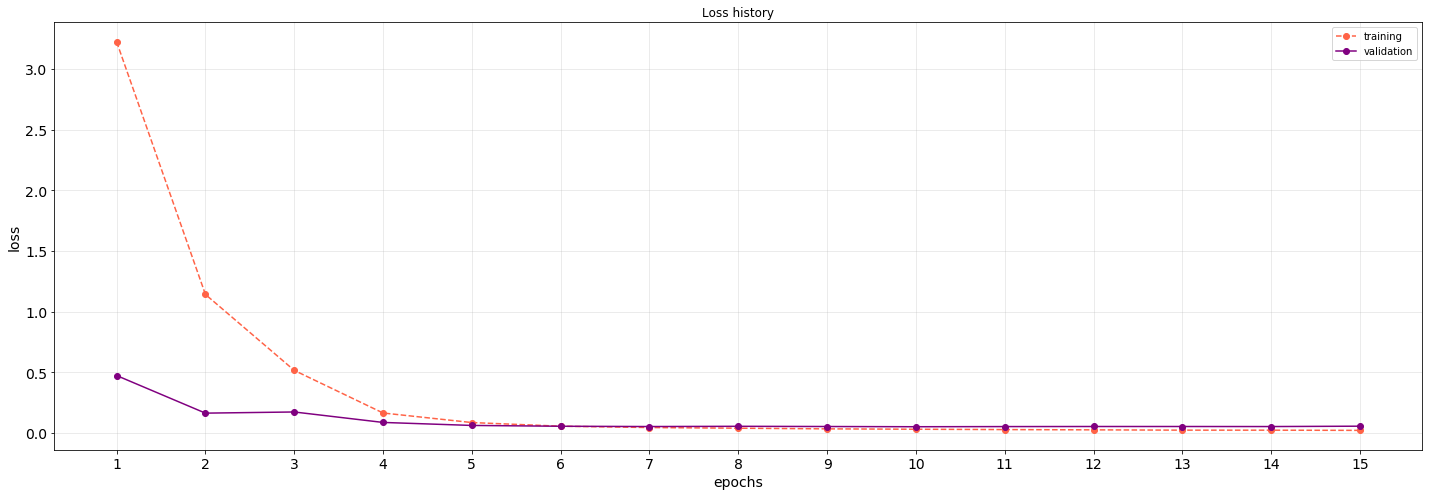

In [310]:
fig, ax1= plt.subplots(figsize=(20, 7))
epochs = range(1, len(loss.history['loss']) + 1)
color1 = 'tomato'
color2 = 'purple'
fontsize = 14
ax1.set_xlabel('epochs', fontsize=fontsize)
ax1.set_ylabel('loss', fontsize=fontsize)
ax1.plot(epochs, loss.history['loss'], '--o', color=color1, label="training")
ax1.plot(epochs, loss.history['val_loss'], '-o', color=color2, label="validation")
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)
ax1.set_xticks(epochs)
ax1.grid(alpha=0.3)
ax1.set_title("Loss history")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

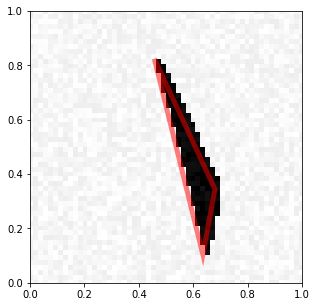

In [312]:
generator.visualize_prediction(X_train[18], Y_train[18])

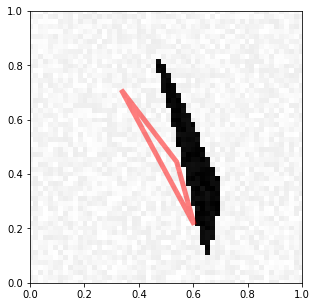

In [313]:
pred = reg_model.predict(X_train[18].reshape((1,) + input_shape)) + 0.5
generator.visualize_prediction(X_train[18], pred)

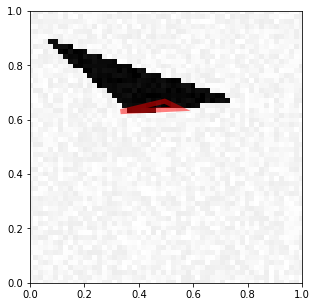

In [316]:
pred = reg_model.predict(X_test[60].reshape((1,) + input_shape)) + 0.5
generator.visualize_prediction(X_test[60], pred)

## 7) Image Denoising

__Generate denoising dataset__

In [357]:
from tqdm import tqdm

In [364]:
def generate_denoising_dataset(nb_samples, max_noise, min_noise=20, free_location=True):
    # Getting im size
    im_size = generator.generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples, im_size])
    Y = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in tqdm(range(nb_samples)):
        category = np.random.randint(3)
        noise = (max_noise - min_noise) * np.random.rand() + min_noise
        seed = np.random.randint(10 * nb_samples)
        np.random.seed(seed)
        if category == 0:
            X[i] = generator.generate_a_rectangle(noise, free_location)
            np.random.seed(seed)
            Y[i] = generator.generate_a_rectangle(free_location)
        elif category == 1:
            X[i] = generator.generate_a_disk(noise, free_location)
            np.random.seed(seed)
            Y[i] = generator.generate_a_disk(free_location)
        else:
            [X[i], _] = generator.generate_a_triangle(noise, free_location)
            np.random.seed(seed)
            [Y[i], _] = generator.generate_a_triangle(free_location)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [365]:
MAX_NOISE = 100
[X_train, Y_train] = generate_denoising_dataset(600, max_noise=MAX_NOISE)
[X_test, Y_test] = generate_denoising_dataset(200, max_noise=MAX_NOISE)

  1%|          | 4/600 [00:00<00:16, 35.53it/s]

Creating data:


  2%|▎         | 5/200 [00:00<00:04, 45.24it/s]

Creating data:


100%|██████████| 200/200 [00:04<00:00, 46.61it/s]


__Generate Hourglass-like model__

In [370]:
from keras.layers import BatchNormalization, concatenate, ReLU, UpSampling2D

In [367]:
n_sample = len(X_train)
input_shape = (generator.IMAGE_SIZE, generator.IMAGE_SIZE, 1)
reg_param = 1e-6

In [394]:
# Input layer
x_in = Input(shape=input_shape)

# Down sample path
x_enc1 = Conv2D(32, kernel_size=5, padding='same', strides=2)(x_in)
x_enc1 = ReLU()(x_enc1)
x_enc1 = BatchNormalization()(x_enc1)

x_enc2 = Conv2D(16, kernel_size=5, padding='same', strides=2)(x_enc1)
x_enc2 = ReLU()(x_enc2)
x_enc2 = BatchNormalization()(x_enc2)

# Up sample path
x_dec = Conv2D(16, kernel_size=5, padding='same')(x_enc2)
x_dec = ReLU()(x_dec)
x_dec = BatchNormalization()(x_dec)
x_dec = UpSampling2D()(x_dec)
x_dec = concatenate([x_dec, x_enc1])

x_dec = UpSampling2D()(x_dec)
x_dec = concatenate([x_dec, x_in])
x_dec = Conv2D(1, kernel_size=5, padding='same')(x_dec)
x_dec = ReLU()(x_dec)
x_dec = BatchNormalization()(x_dec)


hourglass_model = Model(inputs=[x_in], outputs=[x_dec])

In [395]:
hourglass_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_61 (InputLayer)           (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_134 (Conv2D)             (None, 36, 36, 32)   832         input_61[0][0]                   
__________________________________________________________________________________________________
re_lu_32 (ReLU)                 (None, 36, 36, 32)   0           conv2d_134[0][0]                 
__________________________________________________________________________________________________
batch_normalization_35 (BatchNo (None, 36, 36, 32)   128         re_lu_32[0][0]                   
__________________________________________________________________________________________________
conv2d_135

In [396]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.995, epsilon=None, decay=1e-6, amsgrad=False) 
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=1e-3,
                               patience=5)

In [399]:
hourglass_model.compile(loss='mean_squared_error', 
                   optimizer=adam)

loss = hourglass_model.fit(X_train.reshape((n_sample,) + input_shape), 
                           Y_train.reshape((n_sample,) + input_shape),
                           batch_size = 32,
                           epochs = 30,
                           validation_split=0.2,
                           callbacks=[early_stopping])

Train on 480 samples, validate on 120 samples
Epoch 1/30
480/480 [==============================] - 20s 42ms/step - loss: 50694.4104 - val_loss: 50101.8560
Epoch 2/30
480/480 [==============================] - 14s 29ms/step - loss: 50650.4521 - val_loss: 50883.5685
Epoch 3/30
480/480 [==============================] - 14s 29ms/step - loss: 50632.9523 - val_loss: 51088.3940
Epoch 4/30
480/480 [==============================] - 14s 30ms/step - loss: 50620.3747 - val_loss: 50913.4544
Epoch 5/30
480/480 [==============================] - 14s 29ms/step - loss: 50605.9154 - val_loss: 50938.6102
Epoch 6/30
480/480 [==============================] - 14s 29ms/step - loss: 50592.9857 - val_loss: 50557.3013
